# Active Kriging-Monte Carlo Simulation Example 1

Author: Mohit S. Chauhan 
Date: May 20, 2020

In this example, Monte Carlo Sampling is used to generate samples from Normal distribution and new samples are generated adaptively, using U-function as the learning criteria .

Import the necessary libraries. Here we import standard libraries such as numpy, matplotlib and other necessary library for plots, but also need to import the MCS, AKMCS, Kriging and RunModel class from UQpy.

In [1]:
from UQpy.surrogates import Kriging
from UQpy.sampling import MonteCarloSampling, AdaptiveKriging
from UQpy.RunModel import RunModel
from UQpy.distributions import Normal
from series import series
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import time
from UQpy.optimization.MinimizeOptimizer import MinimizeOptimizer

/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:396: BeartypeDecorHintPepDeprecatedWarning: Type hint typing.Callable deprecated by PEP 585. To resolve this, globally replace this hint by the equivalent PEP 585 type hint (e.g., "typing.List[int]" by "list[int]"). See also:
    https://www.python.org/dev/peps/pep-0585
  warn(warning_message, BeartypeDecorHintPepDeprecatedWarning)
/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:396: BeartypeDecorHintPepDeprecatedWarning: Type hint typing.Callable deprecated by PEP 585. To resolve this, globally replace this hint by the equivalent PEP 585 type hint (e.g., "typing.List[int]" by "list[int]"). See also:
    https://www.python.org/dev/peps/pep-0585
  warn(warning_message, BeartypeDecorHintPepDeprecatedWarning)
The selected optimizer method does not support bounds and thus will be ignored.
The selected optimizer method does not support bounds and thus

Using UQpy MCS class to generate samples for two random variables, which are normally distributed with mean 0 and variance 1.

In [2]:
marginals = [Normal(loc=0., scale=4.), Normal(loc=0., scale=4.)]
x = MonteCarloSampling(distributions=marginals, nsamples=20, random_state=1)

RunModel class is used to define an object to evaluate the model at sample points.

In [3]:
rmodel = RunModel(model_script='series.py', vec=False)

Krig class defines an object to generate an surrogate model for a given set of data.

In [4]:
from UQpy.surrogates.kriging.regression_models import Linear
from UQpy.surrogates.kriging.correlation_models import Exponential
optimizer = MinimizeOptimizer(method="L-BFGS-B")
K = Kriging(regression_model=Linear(), correlation_model=Exponential(), optimizer=optimizer,
            correlation_model_parameters=[1, 1], optimizations_number=10)

This example works for all three learning function based on reliability analysis.

AKMCS class is used to generate new sample using 'U-function' as active learning function.

In [5]:
from UQpy.sampling.adaptive_kriging_functions import *
start_time = time.time()
learning_function = WeightedUFunction(weighted_u_stop=2)
a = AdaptiveKriging(runmodel_object=rmodel, surrogate=K, learning_nsamples=10 ** 3, n_add=1,
                    learning_function=learning_function, distributions=marginals, random_state=2)
a.run(nsamples=100, samples=x.samples)
elapsed_time = time.time() - start_time

/Users/dimitris/PycharmProjects/dimtsap/UQpy/src/UQpy/optimization/MinimizeOptimizer.py:24: OptimizeWarning: Unknown solver options: catol
  return minimize(function, initial_guess, args=args,

 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.35794D+01    |proj g|=  9.99000D-01

At iterate    1    f=  2.30021D+01    |proj g|=  6.56510D-01

At iterate    2    f=  2.28806D+01    |proj g|=  8.89656D-01

At iterate    3    f=  2.27085D+01    |proj g|=  9.18277D-01

At iterate    4    f=  2.25341D+01    |proj g|=  2.83441D+00

At iterate    5    f=  2.25252D+01    |proj g|=  3.61447D+00

At iterate    6    f=  2.25252D+01    |proj g|=  3.65551D+00

At iterate    7    f=  2.25252D+01    |proj g|=  3.65816D+00
True

At iterate    8    f=  2.25252D+01    |proj g|=  3.65833D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
P

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.63975D+01    |proj g|=  4.62732D-01

At iterate    1    f=  1.63952D+01    |proj g|=  2.04753D-01

At iterate    2    f=  1.63946D+01    |proj g|=  1.88602D-01

At iterate    3    f=  1.63925D+01    |proj g|=  8.63080D-02

At iterate    4    f=  1.63924D+01    |proj g|=  2.98498D-03

At iterate    5    f=  1.63924D+01    |proj g|=  2.59712D-05
True

At iterate    6    f=  1.63924D+01    |proj g|=  3.56600D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip

At iterate    3    f=  1.78403D+01    |proj g|=  2.11307D-02

At iterate    4    f=  1.78403D+01    |proj g|=  3.28348D-04
True

At iterate    5    f=  1.78403D+01    |proj g|=  2.04676D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      6     0     0   2.047D-05   1.784D+01
  F =   17.840309898779161     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81198D+01    |proj g|=  3.18054D-01

At 

At iterate    1    f=  1.74024D+01    |proj g|=  1.83707D-01

At iterate    2    f=  1.74019D+01    |proj g|=  1.57127D-01

At iterate    3    f=  1.74010D+01    |proj g|=  9.27451D-03

At iterate    4    f=  1.74010D+01    |proj g|=  3.21008D-04
True

At iterate    5    f=  1.74010D+01    |proj g|=  5.15665D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      6     0     0   5.157D-06   1.740D+01
  F =   17.400956425308529     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =         

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.58535D+01    |proj g|=  3.58416D-01

At iterate    1    f=  1.58531D+01    |proj g|=  1.59793D-01

At iterate    2    f=  1.58530D+01    |proj g|=  1.75434D-01

At iterate    3    f=  1.58526D+01    |proj g|=  9.61788D-02

At iterate    4    f=  1.58525D+01    |proj g|=  1.63413D-02

At iterate    5    f=  1.58525D+01    |proj g|=  5.82599D-04
True

At iterate    6    f=  1.58525D+01    |proj g|=  1.58191D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23670D+01    |proj g|=  3.79605D-02

At iterate    1    f=  1.23670D+01    |proj g|=  2.07221D-03
True

At iterate    2    f=  1.23670D+01    |proj g|=  1.36463D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      2     0     0   1.365D-03   1.237D+01
  F =   12.366977156106870     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 


At iterate    1    f=  6.33442D+00    |proj g|=  4.60990D-02

At iterate    2    f=  6.33441D+00    |proj g|=  4.36087D-02

At iterate    3    f=  6.33440D+00    |proj g|=  3.39250D-03

At iterate    4    f=  6.33440D+00    |proj g|=  3.78291D-05
True

At iterate    5    f=  6.33440D+00    |proj g|=  1.28050D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      6     0     0   1.281D-07   6.334D+00
  F =   6.3344023630184836     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =        

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.19420D+00    |proj g|=  5.21451D-01

At iterate    1    f=  5.19358D+00    |proj g|=  6.60443D-02

At iterate    2    f=  5.19358D+00    |proj g|=  2.80580D-03

At iterate    3    f=  5.19358D+00    |proj g|=  1.72310D-03

At iterate    4    f=  5.19358D+00    |proj g|=  5.76763D-05
True

At iterate    5    f=  5.19358D+00    |proj g|=  1.22436D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      6     0    

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10371D+00    |proj g|=  2.16457D-01

At iterate    1    f=  1.10363D+00    |proj g|=  7.30096D-02

At iterate    2    f=  1.10362D+00    |proj g|=  5.63691D-02

At iterate    3    f=  1.10360D+00    |proj g|=  1.35902D-04
True

At iterate    4    f=  1.10360D+00    |proj g|=  3.29520D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      7      4     0     0   3.295D-07   1.104D+00
  F =   1.1035956661211799     

CO

In [6]:
time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
g = a.surrogate.predict(a.learning_set, False)
n_ = a.learning_set.shape[0] + len(a.qoi)
pf = (sum(g < 0) + sum(np.array(a.qoi) < 0)) / n_
print('Time: ', elapsed_time)
print('Function evaluation: ', a.samples.shape[0])
print('Probability of failure: ', pf)

Time:  2.8703060150146484
Function evaluation:  100
Probability of failure:  [0.60181818]


This figure shows the location of new samples generated using active learning function.

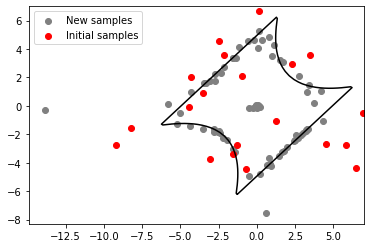

In [7]:
num = 50
x1 = np.linspace(-7, 7, num)
x2 = np.linspace(-7, 7, num)
x1v, x2v = np.meshgrid(x1, x2)
y = np.zeros([num, num])
y_act = np.zeros([num, num])
mse = np.zeros([num, num])
for i in range(num):
    for j in range(num):
        xa = marginals[0].cdf(np.atleast_2d(x1v[i, j]))
        ya = marginals[1].cdf(np.atleast_2d(x2v[i, j]))
        y[i, j] = a.surrogate.predict(np.hstack([xa, ya]))
        y_act[i, j] = series(np.array([[x1v[i, j], x2v[i, j]]]))

fig, ax = plt.subplots()
kr_a = ax.contour(x1v, x2v, y_act, levels=[0], colors='Black')

# Plot for scattered data
nd = x.nsamples
ID1 = ax.scatter(a.samples[nd:, 0], a.samples[nd:, 1], color='Grey', label='New samples')
ID = ax.scatter(x.samples[:nd, 0], x.samples[:nd, 1], color='Red', label='Initial samples')
plt.legend(handles=[ID1, ID])
plt.show()

## User-define Learning function

In [8]:
class UserLearningFunction(LearningFunction):

    def __init__(self, u_stop: int = 2):
        self.u_stop = u_stop

    def evaluate_function(self, distributions, n_add, surrogate, population, qoi=None, samples=None):
        # AKMS class use these inputs to compute the learning function

        g, sig = surrogate.predict(population, True)

        # Remove the inconsistency in the shape of 'g' and 'sig' array
        g = g.reshape([population.shape[0], 1])
        sig = sig.reshape([population.shape[0], 1])

        u = abs(g) / sig
        rows = u[:, 0].argsort()[:n_add]

        indicator = False
        if min(u[:, 0]) >= self.u_stop:
            indicator = True

        return population[rows, :], u[rows, 0], indicator

Creating new instances of Kriging and RunModel class.

In [9]:
K1 = Kriging(regression_model=Linear(), correlation_model=Exponential(), optimizer=optimizer,
             correlation_model_parameters=[1, 1], optimizations_number=10)
rmodel1 = RunModel(model_script='series.py', vec=False)

Executing AKMCS with the user-defined learning function.

In [10]:
start_time = time.time()
ak = AdaptiveKriging(runmodel_object=rmodel1, samples=x.samples, surrogate=K1, learning_nsamples=10 ** 3,
                     n_add=1, learning_function=UserLearningFunction(), distributions=marginals, random_state=3)
ak.run(nsamples=100)
elapsed_time = time.time() - start_time

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.35794D+01    |proj g|=  9.99000D-01

At iterate    1    f=  2.30021D+01    |proj g|=  6.56510D-01

At iterate    2    f=  2.28806D+01    |proj g|=  8.89656D-01

At iterate    3    f=  2.27085D+01    |proj g|=  9.18277D-01

At iterate    4    f=  2.25341D+01    |proj g|=  2.83441D+00

At iterate    5    f=  2.25252D+01    |proj g|=  3.61447D+00

At iterate    6    f=  2.25252D+01    |proj g|=  3.65551D+00

At iterate    7    f=  2.25252D+01    |proj g|=  3.65816D+00
True

[1.09961006e+00 2.46695281e+04]
At iterate    8    f=  2.25252D+01    |proj g|=  3.65833D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at 


 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.



At iterate    2    f=  2.88836D+01    |proj g|=  1.01929D-01

At iterate    3    f=  2.88833D+01    |proj g|=  5.85552D-02

At iterate    4    f=  2.88829D+01    |proj g|=  4.22630D-02

At iterate    5    f=  2.88828D+01    |proj g|=  3.88273D-03

At iterate    6    f=  2.88828D+01    |proj g|=  2.00038D-04
True

At iterate    7    f=  2.88828D+01    |proj g|=  1.54809D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      9      7     0     0   1.548D-05   2.888D+01
  F =   28.882849245936008     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

M

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.50712D+01    |proj g|=  3.10935D-01

At iterate    1    f=  3.50697D+01    |proj g|=  5.16669D-02

At iterate    2    f=  3.50697D+01    |proj g|=  3.72444D-02

At iterate    3    f=  3.50696D+01    |proj g|=  1.53998D-02

At iterate    4    f=  3.50696D+01    |proj g|=  1.04167D-03
True

At iterate    5    f=  3.50696D+01    |proj g|=  4.59186D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      6     0    

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.99901D+01    |proj g|=  2.72065D-01

At iterate    1    f=  3.99894D+01    |proj g|=  3.65983D-02

At iterate    2    f=  3.99894D+01    |proj g|=  2.24764D-02

At iterate    3    f=  3.99894D+01    |proj g|=  1.29352D-02

At iterate    4    f=  3.99894D+01    |proj g|=  1.57298D-03
True

At iterate    5    f=  3.99894D+01    |proj g|=  9.72710D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      6     0    

True

At iterate    4    f=  4.46069D+01    |proj g|=  1.00430D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      4     0     0   1.004D-06   4.461D+01
  F =   44.606937928329423     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.48801D+01    |proj g|=  1.74005D-01

At iterate    1    f=  4.48799D+01    |proj g|=  1.10552D-01

At iterate    2    f=  4.48799D+01    |proj g|=  5.24106D-02

At

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.81040D+01    |proj g|=  2.22453D-01

At iterate    1    f=  4.81038D+01    |proj g|=  1.12471D-01

At iterate    2    f=  4.81037D+01    |proj g|=  6.06044D-02

At iterate    3    f=  4.81036D+01    |proj g|=  5.43020D-04
True

At iterate    4    f=  4.81036D+01    |proj g|=  4.14049D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      4     0     0   4.140D-06   4.810D+01
  F =   48.103642817203834     

CO


At iterate    2    f=  5.21478D+01    |proj g|=  7.80121D-02

At iterate    3    f=  5.21477D+01    |proj g|=  2.26175D-03
True

At iterate    4    f=  5.21477D+01    |proj g|=  2.87089D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      7      5     0     0   2.871D-05   5.215D+01
  F =   52.147667776969193     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.27507D+01    |proj g|=  3.89042D-01

At

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.38910D+01    |proj g|=  3.04369D-01

At iterate    1    f=  5.38905D+01    |proj g|=  5.16389D-02

At iterate    2    f=  5.38905D+01    |proj g|=  3.65720D-02

At iterate    3    f=  5.38905D+01    |proj g|=  4.93236D-03
True

At iterate    4    f=  5.38905D+01    |proj g|=  2.48986D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      7      5     0     0   2.490D-05   5.389D+01
  F =   53.890508748960045     

CO


At iterate    2    f=  5.37101D+01    |proj g|=  5.47756D-03
True

At iterate    3    f=  5.37101D+01    |proj g|=  1.24638D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      3     0     0   1.246D-05   5.371D+01
  F =   53.710138879406387     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.37495D+01    |proj g|=  3.04965D-01

At iterate    1    f=  5.37489D+01    |proj g|=  4.59851D-02

At

In [11]:
time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
g = ak.surrogate.predict(ak.learning_set, False)
n_ = ak.learning_set.shape[0] + len(ak.qoi)
pf = (sum(g < 0) + sum(np.array(ak.qoi) < 0)) / n_
print('Time: ', elapsed_time)
print('Function evaluation: ', ak.samples.shape[0])
print('Probability of failure: ', pf)

Time:  2.580217123031616
Function evaluation:  100
Probability of failure:  [0.61272727]


This figure shows the location of new samples generated using active learning function.

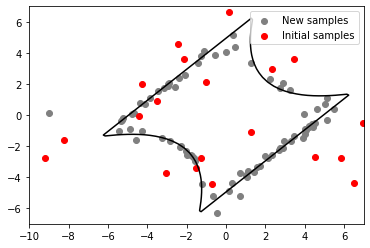

In [12]:
fig1, ax1 = plt.subplots()
kr_a = ax1.contour(x1v, x2v, y_act, levels=[0], colors='Black')

# Plot for scattered data
ID1 = ax1.scatter(ak.samples[nd:, 0], ak.samples[nd:, 1], color='Grey', label='New samples')
ID = ax1.scatter(x.samples[:nd, 0], x.samples[:nd, 1], color='Red', label='Initial samples')
plt.legend(handles=[ID1, ID])
plt.show()

## Monte Carlo Simulation

Probability of failure and covariance is estimated using Monte Carlo Simulation. 10,000 samples are generated randomly using MCS class and model is evaluated at all samples. 

In [13]:
start_time = time.time()

# Code
b = MonteCarloSampling(distributions=marginals, nsamples=10 ** 4, random_state=4)
r1model = RunModel(model_script='series.py', vec=False)
r1model.run(samples=b.samples)
gx = np.array(r1model.qoi_list)
pf_mcs = np.sum(np.array(gx) < 0) / b.nsamples
cov_pf_mcs = np.sqrt((1 - pf_mcs) / (pf_mcs * b.nsamples))
elapsed_time = time.time() - start_time
time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

'00:00:00'

Results from Monte Carlo Simulation.

In [14]:
print('Time: ', elapsed_time)
print('Function evaluation: ', b.nsamples)
print('Probability of failure: ', pf_mcs)

Time:  0.273906946182251
Function evaluation:  10000
Probability of failure:  0.5995
